In [ ]:
import csv

# Detect problematic lines in the CSV file
def detect_problematic_lines(file_path, encoding='latin1'):
    with open(file_path, encoding=encoding) as f:
        reader = csv.reader(f)
        for i, line in enumerate(reader):
            try:
                # Attempt to parse the line
                pd.DataFrame([line])
            except Exception as e:
                print(f"Problematic line {i}: {line}")
                print(e)

# Check for problematic lines in each file
print("Checking train_pc.csv")
detect_problematic_lines('train_pc.csv')
print("Checking valid_pc.csv")
detect_problematic_lines('valid_pc.csv')
print("Checking test_pc.csv")
detect_problematic_lines('test_pc.csv')

Checking train_pc.csv
Checking valid_pc.csv
Checking test_pc.csv


In [ ]:
import pandas as pd

def clean_csv(file_path, output_path, encoding='latin1'):
    with open(file_path, encoding=encoding) as infile, open(output_path, 'w', encoding=encoding) as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        for line in reader:
            try:
                # Try to parse line and write to output if successful
                pd.DataFrame([line])
                writer.writerow(line)
            except Exception as e:
                # Skip problematic line
                print(f"Skipping problematic line: {line}")

# Clean each file and write to new cleaned files
clean_csv('train_pc.csv', 'cleaned_train_pc.csv')
clean_csv('valid_pc.csv', 'cleaned_valid_pc.csv')
clean_csv('test_pc.csv', 'cleaned_test_pc.csv')

In [ ]:
# Load cleaned data with specified encoding
train_df = pd.read_csv('cleaned_train_pc.csv', encoding='latin1')
valid_df = pd.read_csv('cleaned_valid_pc.csv', encoding='latin1')
test_df = pd.read_csv('cleaned_test_pc.csv', encoding='latin1')

# Preview the data
print(train_df.head())

      custom_id                                               text  \
0  pla015439pla                                Ó¨ÑÑÐµ ÐºÒ¯ÑÑÑ   
1  pla083193pla  ÐÓÐ±Ð°Ð·Ð°Ñ Ð¶Ð¾Ðº .ÐÑÐµ ÐºÐµÑÐµÐ¼ÐµÑ Ñ...   
2  pla113624pla  ÐÑÑÑÐ¸ , Ð´Ð°Ð» ÑÑÑÐ° Ð°Ð¹ÑÐ°Ð´Ñ ð...   
3  pla029825pla                              Ð ÐµÐºÐ»Ð°Ð¼Ð° ÐºÐ¾Ð¿   
4  pla002604pla                          5-Ð±Ð°ÒÐ° Ð±ÐµÑÐµÐ¼ÑÐ½   

                                        text_cleaned  label    domain  
0                                Ó©ÑÑÐµ ÐºÒ¯ÑÑÑ      1  appstore  
1  Ð¼ÓÐ±Ð°Ð·Ð°Ñ Ð¶Ð¾Ðº Ð¾ÑÐµ ÐºÐµÑÐµÐ¼ÐµÑ Ñ...      1  appstore  
2            ÐºÑÑÑÐ¸ Ð´Ð°Ð» ÑÑÑÐ° Ð°Ð¹ÑÐ°Ð´Ñ      1  appstore  
3                              ÑÐµÐºÐ»Ð°Ð¼Ð° ÐºÐ¾Ð¿      0  appstore  
4                          5 Ð±Ð°ÒÐ° Ð±ÐµÑÐµÐ¼ÑÐ½      1  appstore  


In [ ]:
import pandas as pd
import re
import chardet

# Function to detect and decode text
def decode_text(text):
    try:
        detected = chardet.detect(text.encode())
        encoding = detected['encoding'] if detected['encoding'] is not None else 'utf-8'
        return text.encode(encoding, errors='ignore').decode('utf-8', errors='ignore')
    except Exception as e:
        print(f"Error decoding text: {e}")
        return text

# Example text cleaning function
def clean_text(text):
    text = decode_text(text)  # Decode text
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b\d+\b', ' ', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip()

# Load your data
train_df = pd.read_csv('cleaned_train_pc.csv', encoding='utf-8')
valid_df = pd.read_csv('cleaned_valid_pc.csv', encoding='utf-8')
test_df = pd.read_csv('cleaned_test_pc.csv', encoding='utf-8')

# Apply cleaning function to the data
train_df['text_cleaned'] = train_df['text'].apply(clean_text)
valid_df['text_cleaned'] = valid_df['text'].apply(clean_text)
test_df['text_cleaned'] = test_df['text'].apply(clean_text)

# Preview cleaned text
print(train_df['text_cleaned'].head())
print(valid_df['text_cleaned'].head())
print(test_df['text_cleaned'].head())

0                                өтте күшті
1    мәбазар жок оте керемет тамаша керемет
2                     кушти дал тура айтады
3                               реклама коп
4                              баға беремін
Name: text_cleaned, dtype: object
0    бәрі жақсы дәрісі күшті көмектесті каспиге көп...
1                         жаксы нарсе екен маган унады
2    олллшшшшлотльб мен су мен оны шығып үй цггшшгг...
3    жаман приложение кунде обнови деп тура беред ө...
4                                         әдемі рахмет
Name: text_cleaned, dtype: object
0            тез тарту керек минутта тартылатын болсын
1    каспи рахмет сендерге куптен куттим кашан прил...
2    маған ұнады өте керемет телефоным как будто ай...
3                              өте іңғайлы үнады маған
4    ассалаумағалейкум оқып жауабын берсеңіздер еке...
Name: text_cleaned, dtype: object


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Transform text to numeric format
X_train_tfidf = vectorizer.fit_transform(train_df['text_cleaned'])
X_valid_tfidf = vectorizer.transform(valid_df['text_cleaned'])
X_test_tfidf = vectorizer.transform(test_df['text_cleaned'])

# Check the shape of the transformed data
print(X_train_tfidf.shape)
print(X_valid_tfidf.shape)
print(X_test_tfidf.shape)

(134368, 5000)
(16796, 5000)
(16797, 5000)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Split data into features and labels
y_train = train_df['label']
y_valid = valid_df['label']
y_test = test_df['label']

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict on the validation set
y_valid_pred = model.predict(X_valid_tfidf)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate the model
print("Validation Accuracy: ", accuracy_score(y_valid, y_valid_pred))
print(classification_report(y_valid, y_valid_pred))

Validation Accuracy:  0.8322219576089546
              precision    recall  f1-score   support

           0       0.64      0.14      0.22      2995
           1       0.84      0.98      0.91     13801

    accuracy                           0.83     16796
   macro avg       0.74      0.56      0.57     16796
weighted avg       0.80      0.83      0.78     16796



In [ ]:
# Predict on the test set
y_test_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Test Accuracy:  0.8316961362148002
              precision    recall  f1-score   support

           0       0.64      0.13      0.21      2993
           1       0.84      0.98      0.91     13804

    accuracy                           0.83     16797
   macro avg       0.74      0.56      0.56     16797
weighted avg       0.80      0.83      0.78     16797



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialize the grid search
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_tfidf, y_train)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Use the best estimator to predict on the validation and test sets
best_model = grid_search.best_estimator_
y_valid_pred = best_model.predict(X_valid_tfidf)
y_test_pred = best_model.predict(X_test_tfidf)

# Evaluate the best model
print("Validation Accuracy: ", accuracy_score(y_valid, y_valid_pred))
print(classification_report(y_valid, y_valid_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Best parameters found:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score:  0.8317084375008941
Validation Accuracy:  0.8321028816384853
              precision    recall  f1-score   support

           0       0.64      0.14      0.22      2995
           1       0.84      0.98      0.91     13801

    accuracy                           0.83     16796
   macro avg       0.74      0.56      0.56     16796
weighted avg       0.80      0.83      0.78     16796

Test Accuracy:  0.8316366017741263
              precision    recall  f1-score   support

           0       0.64      0.13      0.21      2993
           1       0.84      0.98      0.91     13804

    accuracy                           0.83     16797
   macro avg       0.74      0.56      0.56     16797
weighted avg       0.80      0.83      0.78     16797



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predict on the validation and test sets
y_valid_pred_rf = rf_model.predict(X_valid_tfidf)
y_test_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the Random Forest model
print("Validation Accuracy (RF): ", accuracy_score(y_valid, y_valid_pred_rf))
print(classification_report(y_valid, y_valid_pred_rf))
print("Test Accuracy (RF): ", accuracy_score(y_test, y_test_pred_rf))
print(classification_report(y_test, y_test_pred_rf))

Validation Accuracy (RF):  0.8263872350559657
              precision    recall  f1-score   support

           0       0.56      0.13      0.21      2995
           1       0.84      0.98      0.90     13801

    accuracy                           0.83     16796
   macro avg       0.70      0.55      0.56     16796
weighted avg       0.79      0.83      0.78     16796

Test Accuracy (RF):  0.8269333809608859
              precision    recall  f1-score   support

           0       0.56      0.13      0.21      2993
           1       0.84      0.98      0.90     13804

    accuracy                           0.83     16797
   macro avg       0.70      0.55      0.56     16797
weighted avg       0.79      0.83      0.78     16797



In [ ]:
!pip install joblib

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'logistic_regression_model.pkl')

# To load the model later
# model = joblib.load('logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [ ]:
print("Final Model Performance:")

print("Validation Accuracy: ", accuracy_score(y_valid, y_valid_pred))
print("Validation Report: \n", classification_report(y_valid, y_valid_pred))

print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Test Report: \n", classification_report(y_test, y_test_pred))


Final Model Performance:
Validation Accuracy:  0.8321028816384853
Validation Report: 
               precision    recall  f1-score   support

           0       0.64      0.14      0.22      2995
           1       0.84      0.98      0.91     13801

    accuracy                           0.83     16796
   macro avg       0.74      0.56      0.56     16796
weighted avg       0.80      0.83      0.78     16796

Test Accuracy:  0.8316366017741263
Test Report: 
               precision    recall  f1-score   support

           0       0.64      0.13      0.21      2993
           1       0.84      0.98      0.91     13804

    accuracy                           0.83     16797
   macro avg       0.74      0.56      0.56     16797
weighted avg       0.80      0.83      0.78     16797



In [ ]:
#score
!pip install tqdm

In [ ]:
import csv
import pandas as pd

# Function to detect problematic lines in the CSV file
def detect_problematic_lines(file_path, encoding='latin1'):
    with open(file_path, encoding=encoding) as f:
        reader = csv.reader(f)
        for i, line in enumerate(reader):
            try:
                # Attempt to parse the line
                pd.DataFrame([line])
            except Exception as e:
                print(f"Problematic line {i}: {line}")
                print(e)

# Check for problematic lines in each file
print("Checking train_sc.csv")
detect_problematic_lines('train_sc.csv')
print("Checking valid_sc.csv")
detect_problematic_lines('valid_sc.csv')
print("Checking test_sc.csv")
detect_problematic_lines('test_sc.csv')

Checking train_sc.csv
Checking valid_sc.csv
Checking test_sc.csv


In [ ]:
import csv
import pandas as pd

# Function to clean CSV files by removing problematic lines
def clean_csv(file_path, output_path, encoding='latin1'):
    with open(file_path, encoding=encoding) as infile, open(output_path, 'w', encoding=encoding) as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        for line in reader:
            try:
                # Try to parse the line and write to output if successful
                pd.DataFrame([line])
                writer.writerow(line)
            except Exception as e:
                # Skip problematic line
                print(f"Skipping problematic line: {line}")

# Clean each file and write to new cleaned files
clean_csv('train_sc.csv', 'cleaned_train_sc.csv')
clean_csv('valid_sc.csv', 'cleaned_valid_sc.csv')
clean_csv('test_sc.csv', 'cleaned_test_sc.csv')

In [ ]:
# Load cleaned data with specified encoding
train_sc_df = pd.read_csv('cleaned_train_sc.csv', encoding='latin1')
valid_sc_df = pd.read_csv('cleaned_valid_sc.csv', encoding='latin1')
test_sc_df = pd.read_csv('cleaned_test_sc.csv', encoding='latin1')

# Preview the data
print(train_sc_df.head())
print(valid_sc_df.head())
print(test_sc_df.head())

      custom_id                                               text  \
0  pla063804pla  ÐºÐ°ÑÑÐ° Ð°ÑÑÐ»Ð¼Ð°Ð¹Ð´Ñ! ÑÐ¾Ð½Ð´ÑÒÑÐ...   
1  kit003073kit  ÐÐµÑÐµÐ¼ÐµÑ Ð¼Ð¾ÑÐ¸Ð²Ð°ÑÐ¸Ñ Ð¼ÐµÐ½ Ð¶Ð°Ò...   
2  pla040287pla  ÐÒ±ÑÑÑ Ð¶Ò±Ð¼ÑÑ Ð¶Ð°ÑÐ°Ð¼Ð°Ð¹Ð´Ñ. ÐÐ¹...   
3  kit005410kit  Ð¡Ð¾ÒÑÑ ÐºÐµÐ·ÑÐ½Ð´ÐµÐ³Ñ ÑÐ°Ð»ÑÒ ÐºÓ©Ñ...   
4  map001672map  ÐÐµÑÑÑÑ ÑÐ°ÑÐ±Ð°ÒÑ Ó©ÑÐµ ÐºÐµÑÐµÐ¼Ð...   

                                        text_cleaned  label     domain  
0  ÐºÐ°ÑÑÐ° Ð°ÑÑÐ»Ð¼Ð°Ð¹Ð´Ñ ÑÐ¾Ð½Ð´ÑÒÑÐ°...      1   appstore  
1  ÐºÐµÑÐµÐ¼ÐµÑ Ð¼Ð¾ÑÐ¸Ð²Ð°ÑÐ¸Ñ Ð¼ÐµÐ½ Ð¶Ð°Ò...      4  bookstore  
2  Ð´Ò±ÑÑÑ Ð¶Ò±Ð¼ÑÑ Ð¶Ð°ÑÐ°Ð¼Ð°Ð¹Ð´Ñ Ð°Ð¹Ð...      0   appstore  
3  ÑÐ¾ÒÑÑ ÐºÐµÐ·ÑÐ½Ð´ÐµÐ³Ñ ÑÐ°Ð»ÑÒ ÐºÓ©Ñ...      4  bookstore  
4  Ð¶ÐµÑÑÑÑ ÑÐ°ÑÐ±Ð°ÒÑ Ó©ÑÐµ ÐºÐµÑÐµÐ¼Ð...      4    mapping  
      custom_id                                               text  \
0  pla030763pla  Ó¨ÑÐµ ÐºÐµÑÐµÐ¼ÐµÑ ÒÐ¾ÑÑÐ¼ÑÐ° ÐºÓ©Ð¼ÐµÐ...   
1

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import joblib

In [ ]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b\d+\b', ' ', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip()

In [ ]:
# Load the data
train_sc_df = pd.read_csv('cleaned_train_sc.csv', encoding='utf-8')
valid_sc_df = pd.read_csv('cleaned_valid_sc.csv', encoding='utf-8')
test_sc_df = pd.read_csv('cleaned_test_sc.csv', encoding='utf-8')

# Apply the cleaning function to the data
train_sc_df['text_cleaned'] = train_sc_df['text'].apply(clean_text)
valid_sc_df['text_cleaned'] = valid_sc_df['text'].apply(clean_text)
test_sc_df['text_cleaned'] = test_sc_df['text'].apply(clean_text)

# View the first rows of cleaned text
print(train_sc_df['text_cleaned'].head())
print(valid_sc_df['text_cleaned'].head())
print(test_sc_df['text_cleaned'].head())

0    карта ашылмайды сондықтан әзірге жұлдыз кейін ...
1    керемет мотивация мен жаңа көзқарас қалыптасты...
2    дұрыс жұмыс жасамайды аймақты басасың басқа жа...
3    соғыс кезіндегі халық көрген тауқыметті өз көз...
4    жетысу саябағы өте керемет екен ұнағаны шағын ...
Name: text_cleaned, dtype: object
0                   өте керемет қосымша көмекші
1           кім осындай болды губкта нани түсті
2    маған поэма ұнады өміршең шығарма дер едім
3                       жақсы адамдарға ыңғайлы
4                    қазақ тілін құрметтеңіздер
Name: text_cleaned, dtype: object
0                   балаға өте ыңғайлы өте қатты ұнады
1    пабк қа қарағанда графика аиуан және кушті мағ...
2    өте керемет маған өте ұнады егер бұны жассаңыз...
3    қайырлы күн мен билетті қайтарып едім ақшаны қ...
4                           qazaq keybaert маған ұнады
Name: text_cleaned, dtype: object


In [ ]:
# Transform text to numeric format (TF-IDF)
vectorizer_sc = TfidfVectorizer(max_features=5000)
X_train_sc_tfidf = vectorizer_sc.fit_transform(train_sc_df['text_cleaned'])
X_valid_sc_tfidf = vectorizer_sc.transform(valid_sc_df['text_cleaned'])
X_test_sc_tfidf = vectorizer_sc.transform(test_sc_df['text_cleaned'])

y_train_sc = train_sc_df['label']
y_valid_sc = valid_sc_df['label']
y_test_sc = test_sc_df['label']

In [ ]:
from sklearn.model_selection import ParameterGrid, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Convert param_grid to a list of parameter combinations
param_combinations = list(ParameterGrid(param_grid))

# Initialize variables to store the best score and parameters
best_score = float('inf')
best_params = None
best_model = None

# Progress bar for parameter combinations
progress_bar = tqdm(total=len(param_combinations))

# Loop through each parameter combination
for params in param_combinations:
    # Initialize the model with current parameters
    model = RandomForestRegressor(random_state=42, **params)

    # Perform cross-validation and calculate mean score
    scores = []
    for train_idx, valid_idx in KFold(n_splits=2, shuffle=True, random_state=42).split(X_train_sc_tfidf):  # Reduced to 2 folds
        model.fit(X_train_sc_tfidf[train_idx], y_train_sc[train_idx])
        preds = model.predict(X_train_sc_tfidf[valid_idx])
        score = mean_squared_error(y_train_sc[valid_idx], preds)
        scores.append(score)

    mean_score = np.mean(scores)

    # Update the best score and parameters if current score is better
    if mean_score < best_score:
        best_score = mean_score
        best_params = params
        best_model = model

    # Update the progress bar
    progress_bar.update(1)

progress_bar.close()

# Print the best parameters and score
print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)

100%|██████████| 16/16 [39:40<00:00, 148.81s/it]

Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation score:  1.5568768876408177


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_sc_tfidf, y_train_sc)

# Predict on the validation and test sets
y_valid_sc_pred_gb = gb_model.predict(X_valid_sc_tfidf)
y_test_sc_pred_gb = gb_model.predict(X_test_sc_tfidf)

# Evaluate the Gradient Boosting model
print("Validation Mean Absolute Error (GB): ", mean_absolute_error(y_valid_sc, y_valid_sc_pred_gb))
print("Validation Mean Squared Error (GB): ", mean_squared_error(y_valid_sc, y_valid_sc_pred_gb))
print("Validation R2 Score (GB): ", r2_score(y_valid_sc, y_valid_sc_pred_gb))

print("Test Mean Absolute Error (GB): ", mean_absolute_error(y_test_sc, y_test_sc_pred_gb))
print("Test Mean Squared Error (GB): ", mean_squared_error(y_test_sc, y_test_sc_pred_gb))
print("Test R2 Score (GB): ", r2_score(y_test_sc, y_test_sc_pred_gb))

Validation Mean Absolute Error (GB):  0.9348019714596006
Validation Mean Squared Error (GB):  1.5711637302208388
Validation R2 Score (GB):  0.2601555729184125
Test Mean Absolute Error (GB):  0.9427540065309398
Test Mean Squared Error (GB):  1.603572590581566
Test R2 Score (GB):  0.24492288125715667


In [ ]:
print("Gradient Boosting Model:")
print("Validation Mean Absolute Error (GB): ", mean_absolute_error(y_valid_sc, y_valid_sc_pred_gb))
print("Validation Mean Squared Error (GB): ", mean_squared_error(y_valid_sc, y_valid_sc_pred_gb))
print("Validation R2 Score (GB): ", r2_score(y_valid_sc, y_valid_sc_pred_gb))

print("Test Mean Absolute Error (GB): ", mean_absolute_error(y_test_sc, y_test_sc_pred_gb))
print("Test Mean Squared Error (GB): ", mean_squared_error(y_test_sc, y_test_sc_pred_gb))
print("Test R2 Score (GB): ", r2_score(y_test_sc, y_test_sc_pred_gb))

Gradient Boosting Model:
Validation Mean Absolute Error (GB):  0.9348019714596006
Validation Mean Squared Error (GB):  1.5711637302208388
Validation R2 Score (GB):  0.2601555729184125
Test Mean Absolute Error (GB):  0.9427540065309398
Test Mean Squared Error (GB):  1.603572590581566
Test R2 Score (GB):  0.24492288125715667


In [ ]:
import joblib

# Save the Random Forest model
joblib.dump(best_model, 'random_forest_sc_model.pkl')

# Save the Gradient Boosting model
joblib.dump(gb_model, 'gradient_boosting_sc_model.pkl')

# To load the model later
# best_model_sc = joblib.load('random_forest_sc_model.pkl')
# gb_model = joblib.load('gradient_boosting_sc_model.pkl')

['gradient_boosting_sc_model.pkl']

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the validation and test sets using the best Random Forest model
y_valid_sc_pred = best_model.predict(X_valid_sc_tfidf)
y_test_sc_pred = best_model.predict(X_test_sc_tfidf)

# Evaluate the Random Forest model
print("Random Forest Model:")
print("Validation Mean Absolute Error: ", mean_absolute_error(y_valid_sc, y_valid_sc_pred))
print("Validation Mean Squared Error: ", mean_squared_error(y_valid_sc, y_valid_sc_pred))
print("Validation R2 Score: ", r2_score(y_valid_sc, y_valid_sc_pred))

print("Test Mean Absolute Error: ", mean_absolute_error(y_test_sc, y_test_sc_pred))
print("Test Mean Squared Error: ", mean_squared_error(y_test_sc, y_test_sc_pred))
print("Test R2 Score: ", r2_score(y_test_sc, y_test_sc_pred))

Random Forest Model:
Validation Mean Absolute Error:  0.8726490008311867
Validation Mean Squared Error:  1.5526131435069925
Validation R2 Score:  0.2688908485204047
Test Mean Absolute Error:  0.8824598788919958
Test Mean Squared Error:  1.587528794733621
Test R2 Score:  0.25247745235279473


In [ ]:
# Evaluate the Gradient Boosting model
print("Gradient Boosting Model:")
print("Validation Mean Absolute Error (GB): ", mean_absolute_error(y_valid_sc, y_valid_sc_pred_gb))
print("Validation Mean Squared Error (GB): ", mean_squared_error(y_valid_sc, y_valid_sc_pred_gb))
print("Validation R2 Score (GB): ", r2_score(y_valid_sc, y_valid_sc_pred_gb))

print("Test Mean Absolute Error (GB): ", mean_absolute_error(y_test_sc, y_test_sc_pred_gb))
print("Test Mean Squared Error (GB): ", mean_squared_error(y_test_sc, y_test_sc_pred_gb))
print("Test R2 Score (GB): ", r2_score(y_test_sc, y_test_sc_pred_gb))

Gradient Boosting Model:
Validation Mean Absolute Error (GB):  0.9348019714596006
Validation Mean Squared Error (GB):  1.5711637302208388
Validation R2 Score (GB):  0.2601555729184125
Test Mean Absolute Error (GB):  0.9427540065309398
Test Mean Squared Error (GB):  1.603572590581566
Test R2 Score (GB):  0.24492288125715667


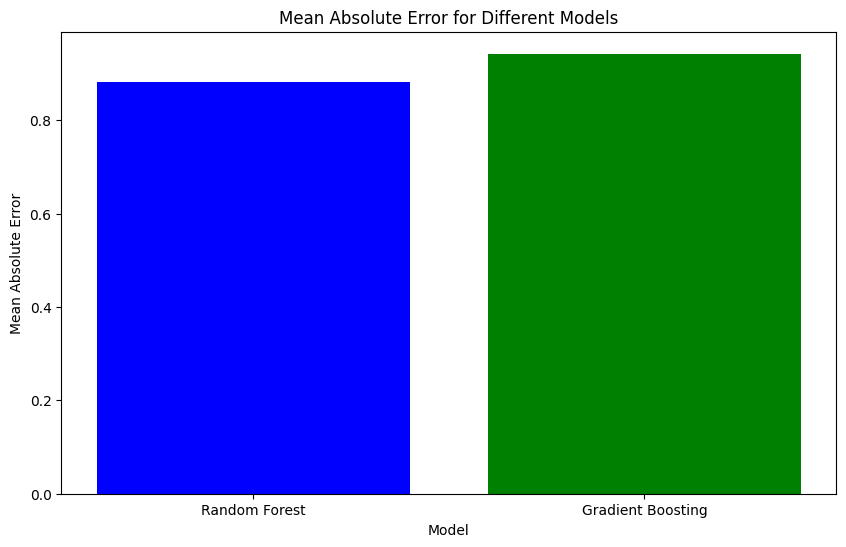

In [ ]:
import matplotlib.pyplot as plt

# Visualization for Mean Absolute Error
mae_values = [mean_absolute_error(y_test_sc, y_test_sc_pred), mean_absolute_error(y_test_sc, y_test_sc_pred_gb)]
models = ['Random Forest', 'Gradient Boosting']

plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color=['blue', 'green'])
plt.title('Mean Absolute Error for Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.show()

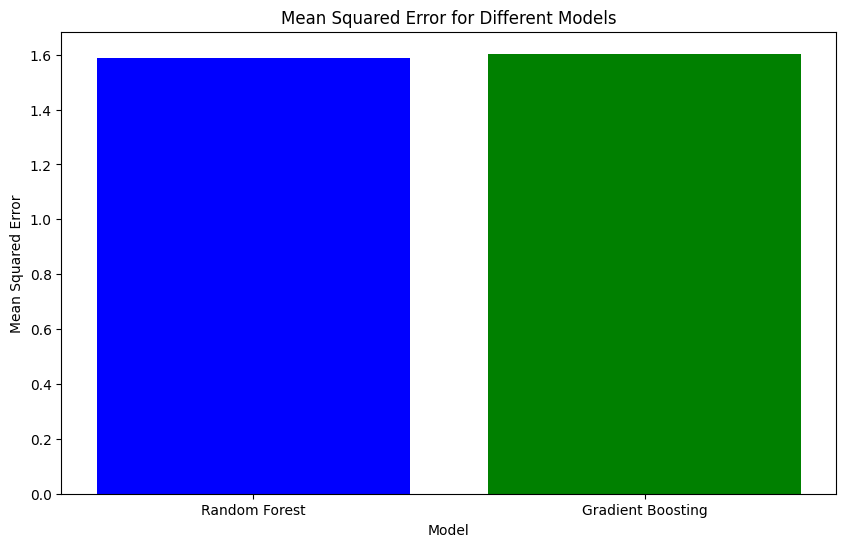

In [ ]:
# Visualization for Mean Squared Error
mse_values = [mean_squared_error(y_test_sc, y_test_sc_pred), mean_squared_error(y_test_sc, y_test_sc_pred_gb)]
models = ['Random Forest', 'Gradient Boosting']

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'green'])
plt.title('Mean Squared Error for Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()

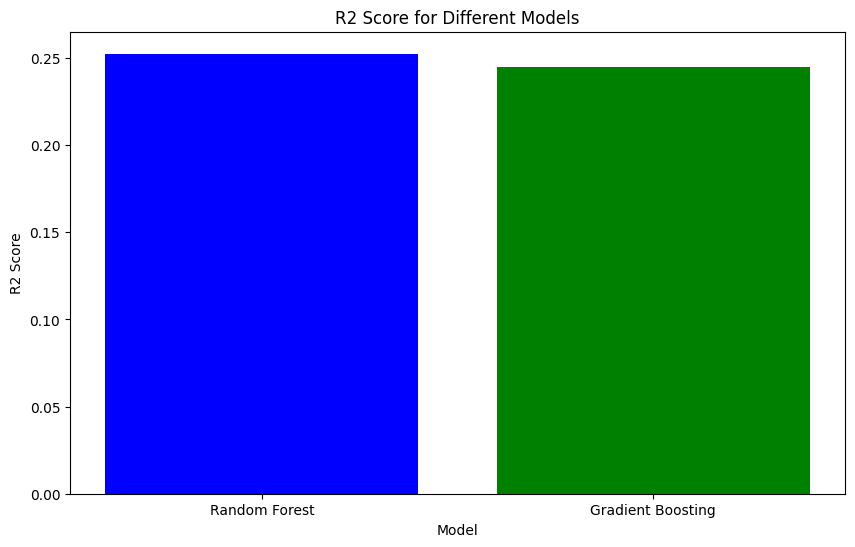

In [ ]:
# Visualization for R2 Score
r2_values = [r2_score(y_test_sc, y_test_sc_pred), r2_score(y_test_sc, y_test_sc_pred_gb)]
models = ['Random Forest', 'Gradient Boosting']

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['blue', 'green'])
plt.title('R2 Score for Different Models')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()

In [ ]:
print("Final Model Performance for Score Classification:")
print("Random Forest Model:")
print("Validation Mean Absolute Error: ", mean_absolute_error(y_valid_sc, y_valid_sc_pred))
print("Validation Mean Squared Error: ", mean_squared_error(y_valid_sc, y_valid_sc_pred))
print("Validation R2 Score: ", r2_score(y_valid_sc, y_valid_sc_pred))

print("Test Mean Absolute Error: ", mean_absolute_error(y_test_sc, y_test_sc_pred))
print("Test Mean Squared Error: ", mean_squared_error(y_test_sc, y_test_sc_pred))
print("Test R2 Score: ", r2_score(y_test_sc, y_test_sc_pred))

print("Gradient Boosting Model:")
print("Validation Mean Absolute Error (GB): ", mean_absolute_error(y_valid_sc, y_valid_sc_pred_gb))
print("Validation Mean Squared Error (GB): ", mean_squared_error(y_valid_sc, y_valid_sc_pred_gb))
print("Validation R2 Score (GB): ", r2_score(y_valid_sc, y_valid_sc_pred_gb))

print("Test Mean Absolute Error (GB): ", mean_absolute_error(y_test_sc, y_test_sc_pred_gb))
print("Test Mean Squared Error (GB): ", mean_squared_error(y_test_sc, y_test_sc_pred_gb))
print("Test R2 Score (GB): ", r2_score(y_test_sc, y_test_sc_pred_gb))

Final Model Performance for Score Classification:
Random Forest Model:
Validation Mean Absolute Error:  0.8726490008311867
Validation Mean Squared Error:  1.5526131435069925
Validation R2 Score:  0.2688908485204047
Test Mean Absolute Error:  0.8824598788919958
Test Mean Squared Error:  1.587528794733621
Test R2 Score:  0.25247745235279473
Gradient Boosting Model:
Validation Mean Absolute Error (GB):  0.9348019714596006
Validation Mean Squared Error (GB):  1.5711637302208388
Validation R2 Score (GB):  0.2601555729184125
Test Mean Absolute Error (GB):  0.9427540065309398
Test Mean Squared Error (GB):  1.603572590581566
Test R2 Score (GB):  0.24492288125715667


In [ ]:
#full

In [ ]:
import pandas as pd

# Try reading the file with different encodings
encodings = ['utf-8', 'latin1', 'cp1252']

for encoding in encodings:
    try:
        full_df = pd.read_csv('full.csv', encoding=encoding)
        print(f"Successfully loaded with encoding: {encoding}")
        print(full_df.head())
        break
    except UnicodeDecodeError as e:
        print(f"Failed with encoding: {encoding}")
        print(e)

Successfully loaded with encoding: utf-8
      custom_id                                               text  label  \
0  gis000001gis        Тамақтарыңыз өте дәмді екен. Көп көп рақмет      5   
1  gis000002gis  Пасуда кір , официанттардын устінен сасык иіс ...      1   
2  gis000003gis  Ыдыстары жуылмаган таза емес , стакан акелип б...      1   
3  gis000004gis  Түскі 12де келдік. Е анау жоқ, е мынау жоқ. Не...      1   
4  gis000005gis  Масқара! Кеше ауызашарда масқара болдық, 15200...      1   

    domain  
0  mapping  
1  mapping  
2  mapping  
3  mapping  
4  mapping  


In [ ]:
import re

# Example text cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b\d+\b', ' ', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip()

# Apply cleaning function to the data
full_df['text_cleaned'] = full_df['text'].apply(clean_text)

# Preview cleaned text
print(full_df['text_cleaned'].head())

0           тамақтарыңыз өте дәмді екен көп көп рақмет
1    пасуда кір официанттардын устінен сасык иіс шы...
2    ыдыстары жуылмаган таза емес стакан акелип бер...
3    түскі 12де келдік е анау жоқ е мынау жоқ не ба...
4    масқара кеше ауызашарда масқара болдық теңгеге...
Name: text_cleaned, dtype: object


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
vectorizer_full = TfidfVectorizer(max_features=5000)

# Transform text to numeric format
X_full_tfidf = vectorizer_full.fit_transform(full_df['text_cleaned'])

# Check the shape of the transformed data
print(X_full_tfidf.shape)

(180064, 5000)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_full_tfidf, full_df['label'], test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model_full = RandomForestRegressor(n_estimators=100, random_state=42)
model_full.fit(X_train, y_train)

# Predict on the test set
y_test_pred = model_full.predict(X_test)

# Evaluate the model
print("Test Mean Absolute Error: ", mean_absolute_error(y_test, y_test_pred))
print("Test Mean Squared Error: ", mean_squared_error(y_test, y_test_pred))
print("Test R2 Score: ", r2_score(y_test, y_test_pred))

Test Mean Absolute Error:  0.7250173100331498
Test Mean Squared Error:  1.4727495743108234
Test R2 Score:  0.2997830775131479


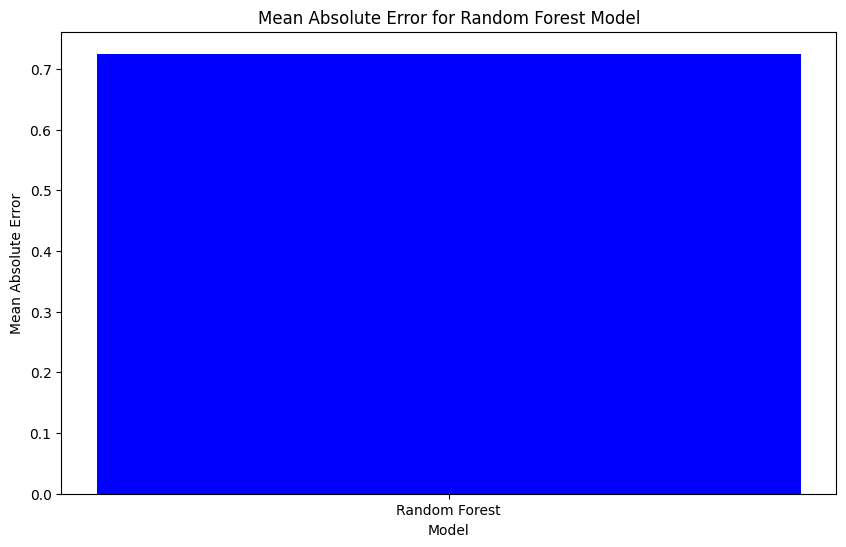

In [ ]:
import matplotlib.pyplot as plt

# Visualization for Mean Absolute Error
mae_values = [mean_absolute_error(y_test, y_test_pred)]
models = ['Random Forest']

plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color=['blue'])
plt.title('Mean Absolute Error for Random Forest Model')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.show()

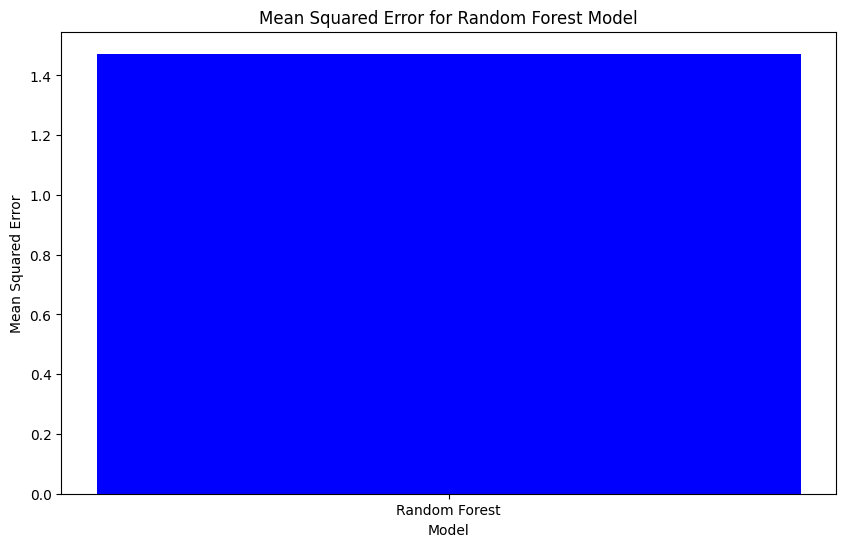

In [ ]:
# Visualization for Mean Squared Error
mse_values = [mean_squared_error(y_test, y_test_pred)]
models = ['Random Forest']

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue'])
plt.title('Mean Squared Error for Random Forest Model')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()

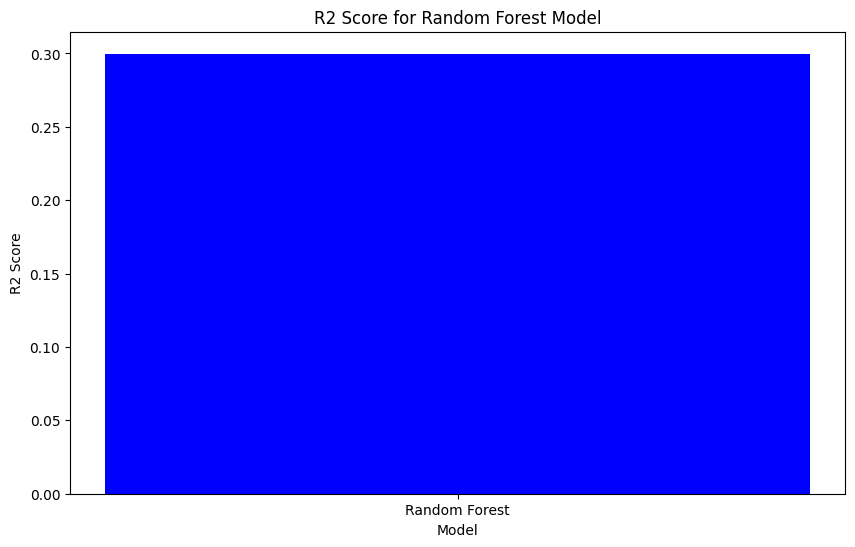

In [ ]:
# Visualization for R2 Score
r2_values = [r2_score(y_test, y_test_pred)]
models = ['Random Forest']

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['blue'])
plt.title('R2 Score for Random Forest Model')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()

In [ ]:
import joblib

# Save the Random Forest model
joblib.dump(model_full, 'random_forest_full_model.pkl')

# To load the model later
# model_full = joblib.load('random_forest_full_model.pkl')